**Step** by Step Guide for Project

Data Collection: Gather a dataset containing information about financial transactions, including both legitimate and fraudulent examples. There are several sources you can explore, such as Kaggle, public repositories, or even partnering with financial institutions to obtain anonymized data.

Data Preprocessing: Clean and preprocess the dataset to make it suitable for training a machine learning model. This step involves tasks such as removing duplicates, handling missing values, encoding categorical variables, and normalizing numerical features. It's crucial to ensure the quality and integrity of the data at this stage.

Exploratory Data Analysis (EDA): Perform EDA to gain insights into the dataset. Visualize the data, calculate descriptive statistics, and identify patterns or correlations between variables. This analysis will help you understand the distribution of fraudulent transactions and guide feature engineering.

Feature Engineering: Create additional features or modify existing ones to enhance the predictive power of your model. Consider domain knowledge and insights from the EDA stage to generate informative features. Feature engineering might include creating aggregate statistics, time-based features, or deriving new variables from existing ones.

Data Splitting: Split the preprocessed dataset into training, validation, and testing sets. Typically, the dataset is divided into a training set (around 70-80% of the data) used for model training, a validation set (10-15%) for hyperparameter tuning, and a testing set (10-15%) for evaluating the final model's performance.

Model Selection: Choose an appropriate machine learning algorithm for your fraud detection task. Commonly used algorithms include logistic regression, decision trees, random forests, gradient boosting methods (e.g., XGBoost, LightGBM), or even deep learning models such as neural networks.

Model Training: Train your chosen model using the training dataset. Make sure to set aside a validation set for assessing the model's performance during training. Experiment with different hyperparameters, such as learning rates, regularization techniques, or tree depths, using techniques like cross-validation to find the best configuration.

Model Evaluation: Evaluate the trained model using the testing dataset. Calculate various performance metrics such as accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC). These metrics will help you understand the model's ability to detect fraudulent transactions accurately.

Model Optimization: If the initial model performance is not satisfactory, consider optimizing it further. You can try techniques like feature selection, hyperparameter tuning, or exploring different algorithms or ensemble methods to improve the model's performance.

Deployment: Once you're satisfied with your model's performance, you can deploy it into a production environment. Create a pipeline that takes in new transaction data, preprocesses it using the same steps as in the training phase, and uses the trained model to make predictions in real-time.

Monitoring and Iteration: Continuously monitor the performance of your deployed model in the production environment. Collect feedback and new data to further improve the model over time. As fraudsters evolve their tactics, you may need to retrain the model periodically or incorporate new techniques to adapt to changing patterns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
chunks=[]

#using chunksize parameter to read the file in smaller manageable chunks without loading file into memory at once
for chunk in pd.read_csv('fraud_0.1origbase.csv', chunksize = 20000 ):
  chunks.append(chunk)

df = pd.concat(chunks)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
636257,351,CASH_OUT,28761.10,C742050657,0.0,0.00,C568407561,328534.52,357295.62,0,0
636258,184,CASH_OUT,167820.71,C561181412,62265.0,0.00,C1852953580,106429.48,274250.18,0,0
636259,35,PAYMENT,8898.12,C1773417333,30808.0,21909.88,M445701551,0.00,0.00,0,0
636260,277,CASH_OUT,176147.90,C1423233247,83669.0,0.00,C1328739120,0.00,176147.90,0,0
636261,304,CASH_OUT,95142.89,C874575079,0.0,0.00,C666451134,431380.07,526522.96,0,0


Removing the 'nameOrig' and 'nameDest' columns


In [4]:
#df = df.drop(['nameOrig','nameDest'],axis=1)

Checking for missing values

In [5]:
#check if any missing values exist
df.isnull().values.any()

#check to see how many missing values exist
df.isnull().values.sum()


0

Example Data Imputation: filling missing values with estimated values using mean, median or mode

In [ ]:
#Impute missing values with the mean for numerical columns
newdf = df.fillna(df.mean())

#Impute missing values with the mode for categorical columns
newdf.fillna(df.mode().iloc[0],inplace=True)

newdf.loc[(newdf['isFraud']!=0) & (newdf['isFraud']!=1),'isFraud'] = 0.000000
newdf

Example - Advanced Data Imputation Techniques

In [ ]:
from sklearn.impute import KNNImputer

#KNN imputation is to replace missing values with estimated values based on
#the values of their nearest neighbors in the feature space.

#KNN only works for numerical data, as it operates based on the distance between
#data points in a multidimensional space, and it uses this distance to find the k-nearest neighbors for each data point.

# Initialize the KNNImputer and use it to impute missing values
imputer = KNNImputer(n_neighbors=5)

numerical_cols = df.select_dtypes(include='number').columns
newdf2 = df.copy()
newdf2[numerical_cols] = imputer.fit_transform(df[numerical_cols])
newdf2


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283.0,CASH_IN,210329.84,3778062.79,3988392.640,1519266.60,1308936.76,0.0,0.0
1,132.0,CASH_OUT,215489.19,21518.00,0.000,6345756.55,6794954.89,0.0,0.0
2,355.0,DEBIT,4431.05,20674.00,16242.950,80876.56,85307.61,0.0,0.0
3,135.0,CASH_OUT,214026.20,46909.73,0.000,13467450.36,13681476.56,0.0,0.0
4,381.0,CASH_OUT,8858.45,0.00,0.000,1667180.58,1676039.03,0.0,0.0
...,...,...,...,...,...,...,...,...,...
257400,18.0,PAYMENT,34686.98,20629.47,0.000,0.00,0.00,0.0,0.0
257401,332.0,CASH_OUT,28402.90,249164.72,220761.830,440600.96,66060.10,0.0,0.0
257402,130.0,CASH_OUT,647767.85,384838.00,0.000,619873.99,1267641.84,0.0,0.0
257403,373.0,PAYMENT,13643.17,0.00,0.000,0.00,0.00,0.0,0.0


Example - Removing Missing Values


In [ ]:
#removing rows with missing values, inplace=True means that it will modify existing dataframe instead of creating new one that's modified
df.dropna(axis=0,inplace = True)

Renaming Columns and Adding Columns (Change in Original Account and change in Destination Account)


In [6]:
df.rename(columns={"step":"cumulative_duration","oldbalanceOrg":"oldbalanceOrig"},inplace=True)

df['changebalanceOrig'] = df['newbalanceOrig'] - df['oldbalanceOrig']
df['changebalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df

,cumulative_duration,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0,210329.85,-210329.84
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0,-21518.00,449198.34
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0,-4431.05,4431.05
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0,-46909.73,214026.20
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0,0.00,8858.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0,0,0.00,28761.10
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0,0,-62265.00,167820.70
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0,0,-8898.12,0.00
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0,0,-83669.00,176147.90


We can see that in some cases, the change in original account does not match the change in destination account, maybe scammers had transfers from other victims as well, or there were just other random transactions

Description Statistics for Numerical and Categorical Values/Attributes


In [7]:
#Temporarily Converting values 0 and 1 to No and Yes, will help with data description and analysis sections
df['isFraud'] = df['isFraud'].replace({0.0:'No', 1.0:"Yes"})
df['isFlaggedFraud'] = df['isFlaggedFraud'].replace({0.0:'No', 1.0:"Yes"})

#Categorical Attributes
categorical_cols = df.select_dtypes(include='object')
categorical_cols.describe()

,type,nameOrig,nameDest,isFraud,isFlaggedFraud
count,636262,636262,636262,636262,636262
unique,5,636171,457224,2,2
top,CASH_OUT,C334643493,C2083562754,No,No
freq,224216,2,14,635441,636260


1. Frequency of 'isFlaggedFraud' being Yes is much lower than frequency of 'isFraud' being Yes, indicating that model that trained the dataset was not very accurate (this model will be much better!)

2. 5 different transaction types - with 'CASH_OUT' being the most common

3. nameDest had much less unique values than nameOrig, prob due to many of nameDest users being scammers

4. nameDest and nameOrig have many unique categorical values, hence may not be feasible to perform encoding of these categorical variables without prior preprocessing, can consider removing these columns/preprocess these columns further

In [8]:
#Numerical Attributes
df['amount'].max()
numerical_cols = df.select_dtypes(include = 'number')
describe = numerical_cols.describe().T
describe['variation coefficient'] = numerical_cols.std()/numerical_cols.mean()
describe['range'] = numerical_cols.max()-numerical_cols.min()
describe['skew'] = numerical_cols.skew()

describe

,count,mean,std,min,25%,50%,75%,max,variation coefficient,range,skew
cumulative_duration,636262.0,2.429319e+02,1.423309e+02,1.00,155.0000,238.000,3.340000e+02,7.420000e+02,0.585888,7.410000e+02,0.375052
amount,636262.0,1.800585e+05,6.069714e+05,0.00,13407.4250,74815.770,2.084988e+05,5.722962e+07,3.370967,5.722962e+07,29.577107
oldbalanceOrig,636262.0,8.317937e+05,2.885636e+06,0.00,0.0000,14239.000,1.072998e+05,4.368662e+07,3.469173,4.368662e+07,5.243428
newbalanceOrig,636262.0,8.528354e+05,2.921296e+06,0.00,0.0000,0.000,1.435652e+05,4.367380e+07,3.425393,4.367380e+07,5.173614
oldbalanceDest,636262.0,1.096212e+06,3.375389e+06,0.00,0.0000,131539.745,9.384820e+05,3.551855e+08,3.079138,3.551855e+08,20.622388
newbalanceDest,636262.0,1.221809e+06,3.656213e+06,0.00,0.0000,214712.725,1.109230e+06,3.555534e+08,2.992460,3.555534e+08,19.623903
changebalanceOrig,636262.0,2.104172e+04,1.460819e+05,-10000000.00,-10187.8725,0.000,0.000000e+00,1.379095e+06,6.942488,1.137909e+07,-25.209880
changebalanceDest,636262.0,1.255963e+05,8.479049e+05,-6214174.81,0.0000,0.000,1.491360e+05,8.283031e+07,6.751035,8.904449e+07,35.016213


1. All numerical attributes have a variation coefficient greater than 0.25, indicating high variability and unhomogeneous data. High variability could allow model to capture relevant patterns in dataset, as model is trained on diverse scenarios and variations.

2. The cumulative_duration variable starts from 1 hour to 742 hours (30 days).

3. The amount transacted and changebalanceDest have a large positive skew, indicating presence of unusually large values greater than rest of values that pulls mean to the right (some transactions to dest account was exceptionally large)

4. changebalanceOrig however had a large negative skew value, indicating presence of unusually small values smaller than rest of values (some transactions out of orig account were unusually large, large decrease in orig account balance)

#Exploratory Data Analysis

Plotting histograms to see the probability of it being Fraud and Not Fraud for each numerical input feature




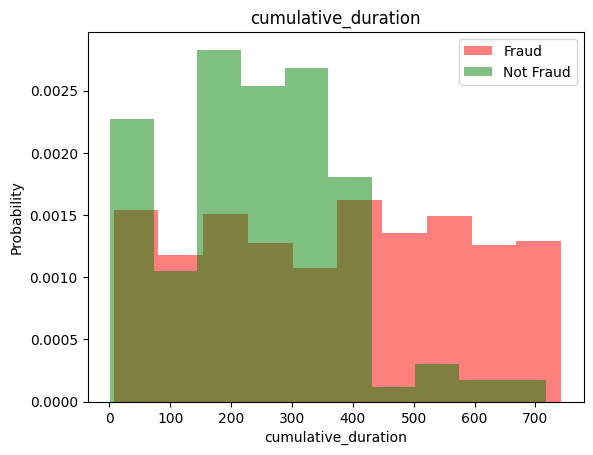

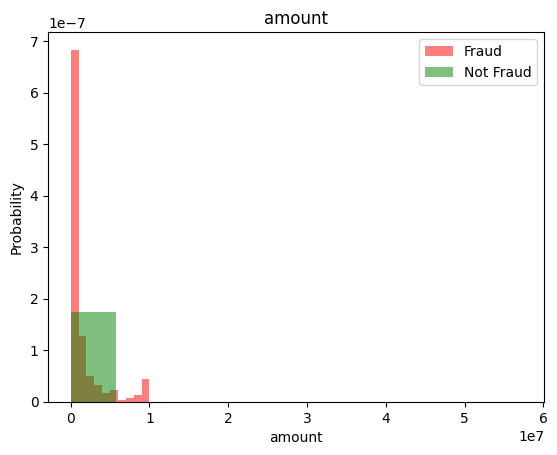

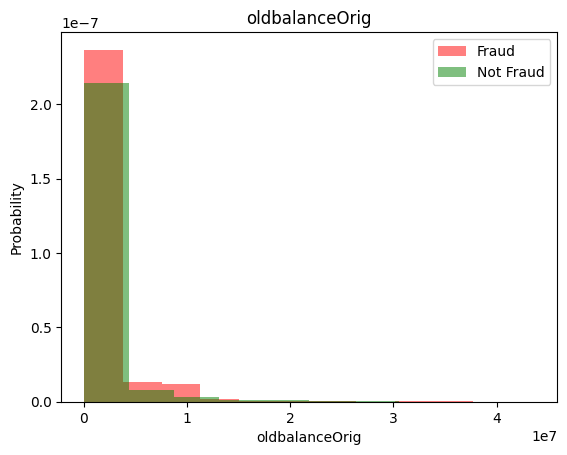

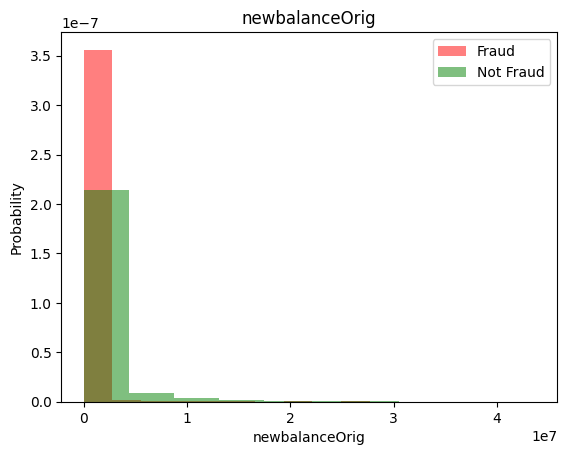

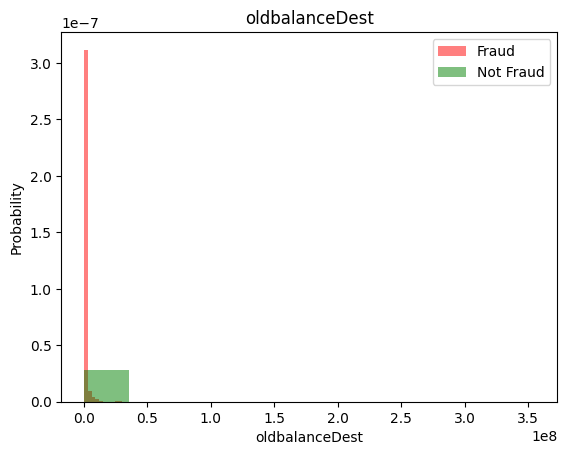

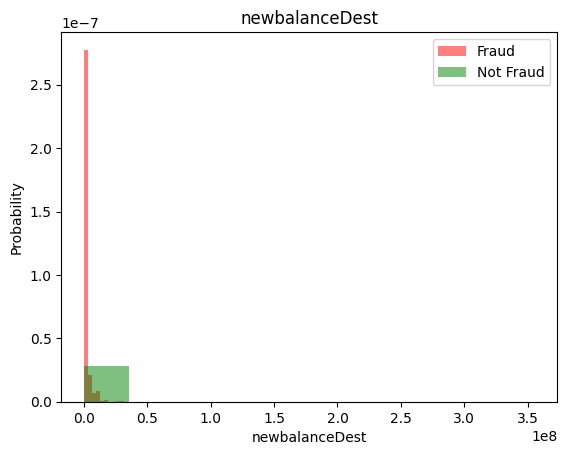

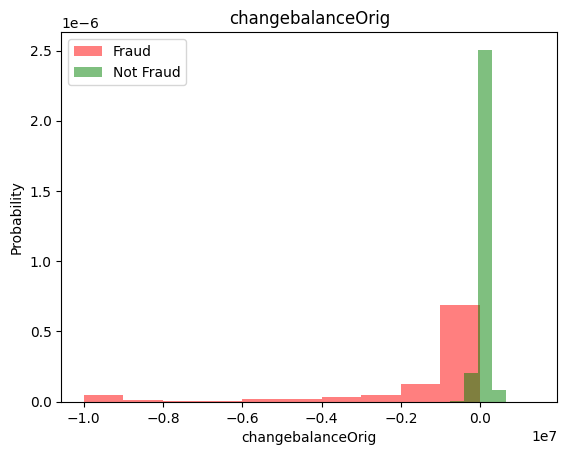

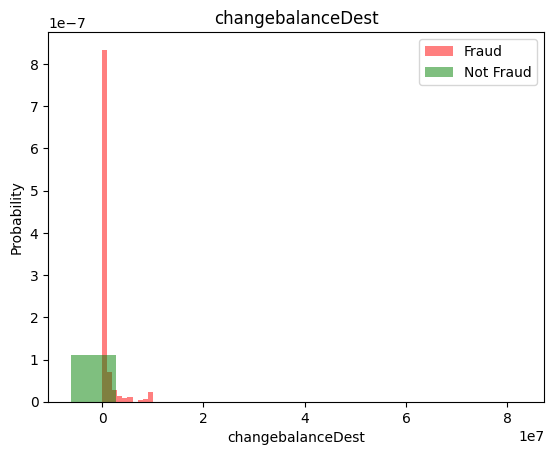

In [ ]:
for feature in numerical_cols.columns:
  plt.hist(df [df['isFraud']=='Yes'] [feature], density=True, label="Fraud", alpha=0.5, color="red")
  plt.hist(df [df['isFraud']=='No'] [feature], density=True, label="Not Fraud", alpha=0.5, color="green")
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()


Plotting histograms to see the probability of it being Fraud and Not Fraud for each categorical input feature

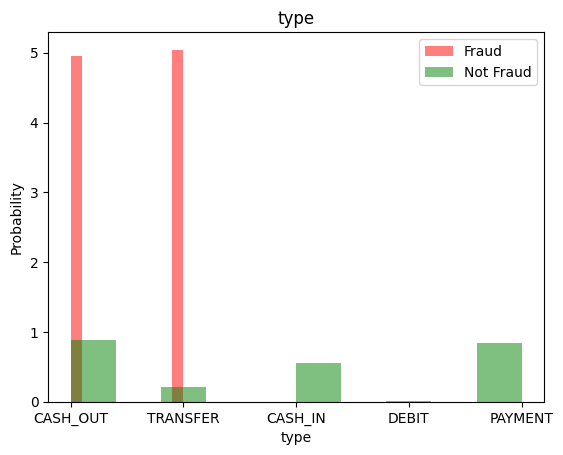

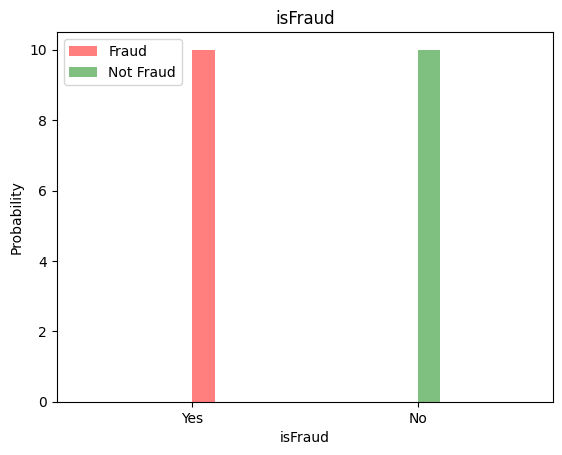

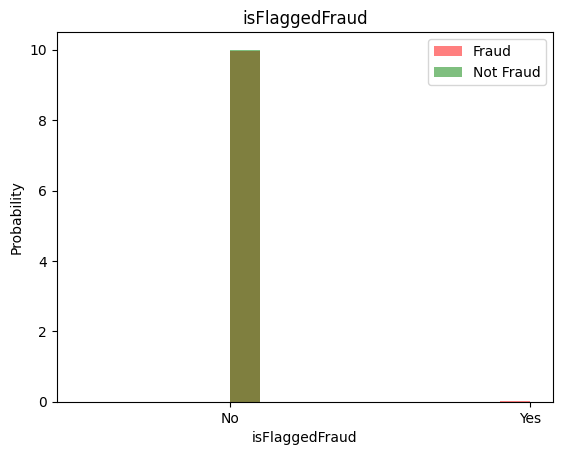

,cumulative_duration,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,No,No,210329.85,-210329.84
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,No,No,-21518.00,449198.34
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,No,No,-4431.05,4431.05
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,No,No,-46909.73,214026.20
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,No,No,0.00,8858.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,No,No,0.00,28761.10
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,No,No,-62265.00,167820.70
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,No,No,-8898.12,0.00
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,No,No,-83669.00,176147.90


In [ ]:
#removing the namesOrig and namesDest input features, as there are just too many distinct categories/names for these features

for feature in categorical_cols.drop(['nameOrig','nameDest'],axis=1).columns:
  plt.hist(df [df['isFraud']=='Yes'] [feature], density=True, label="Fraud", alpha=0.5, color="red")
  plt.hist(df [df['isFraud']=='No'] [feature], density=True, label="Not Fraud", alpha=0.5, color="green")
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()
df

Pointplot to show estimate of central tendency/mean of numerical_features for each value of isFraud categorical variable

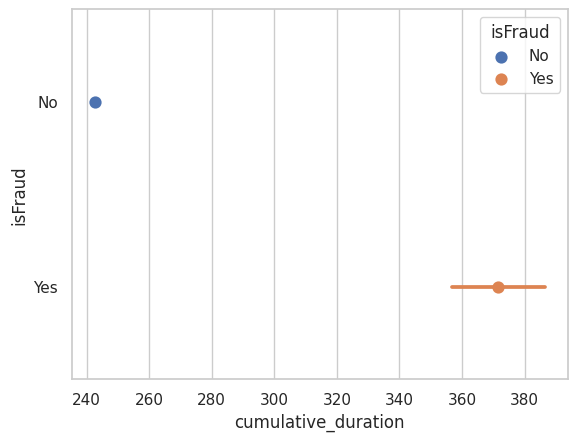

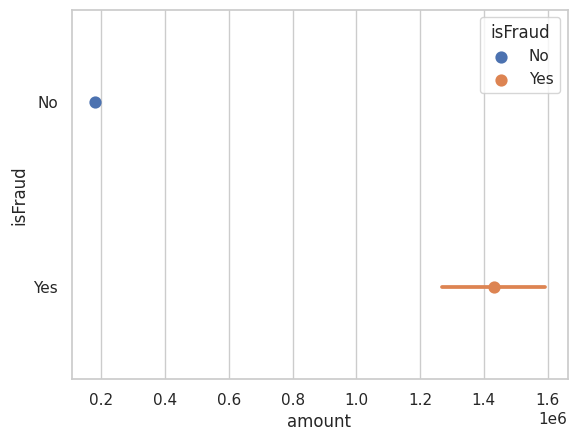

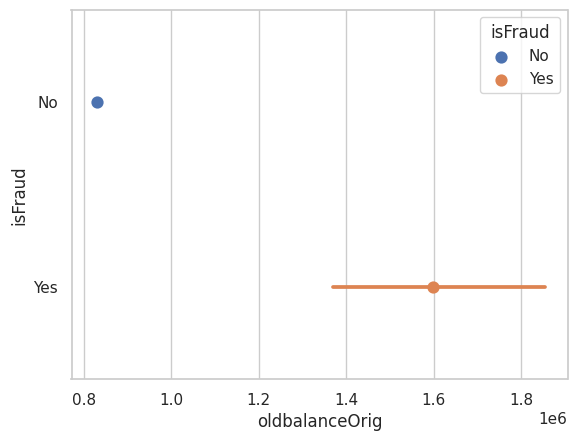

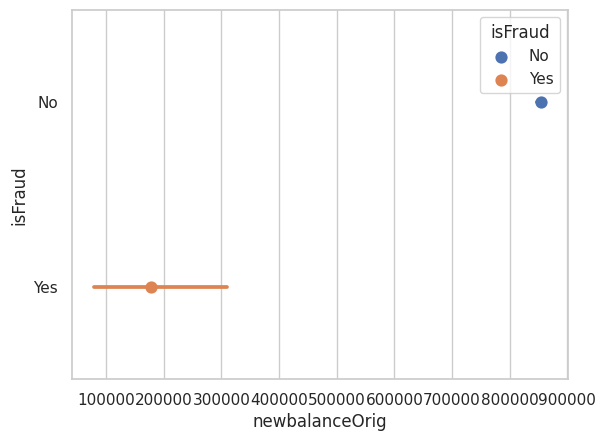

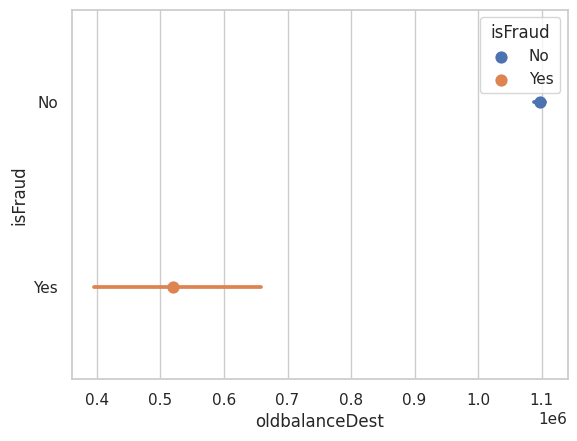

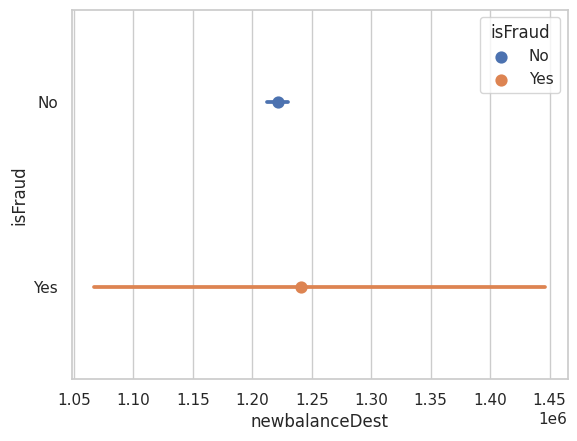

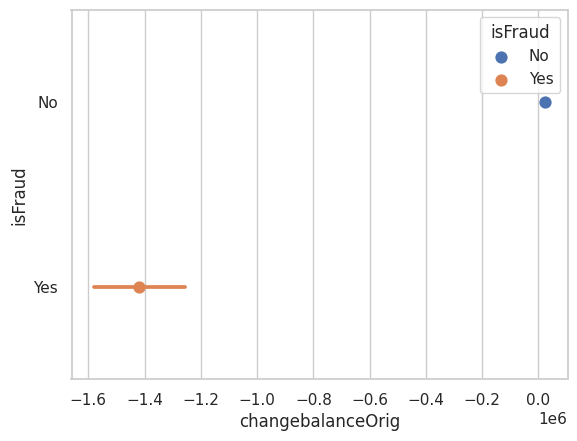

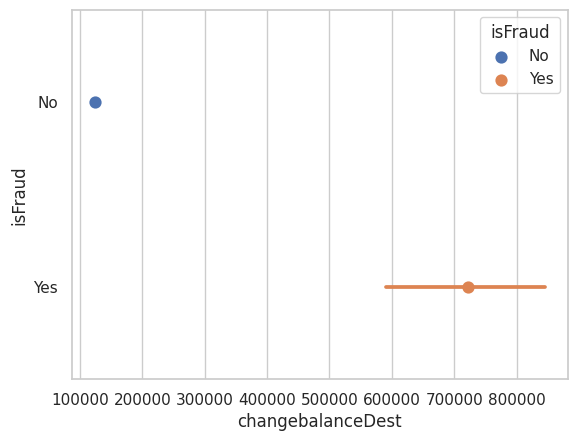

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

for numerical_feature in numerical_cols.columns:
  plt.figure()
  sns.pointplot(data=df, x=numerical_feature, y="isFraud", hue="isFraud")
  plt.show()

Countplot to show the count of isFraud and isNotFraud for every category in each categorical_feature (though a logarithm is applied to yscale to reduce count differences between isFraud and isNotFraud for better visualization)

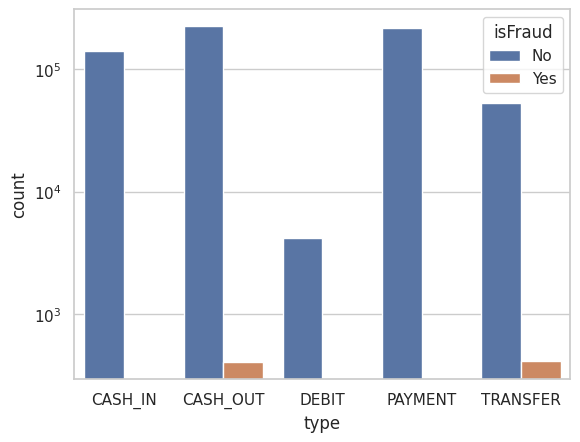

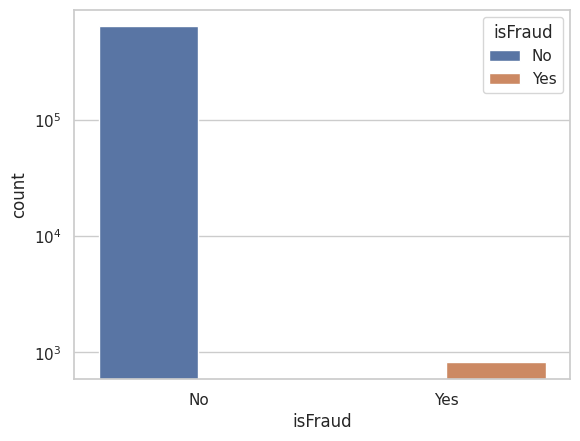

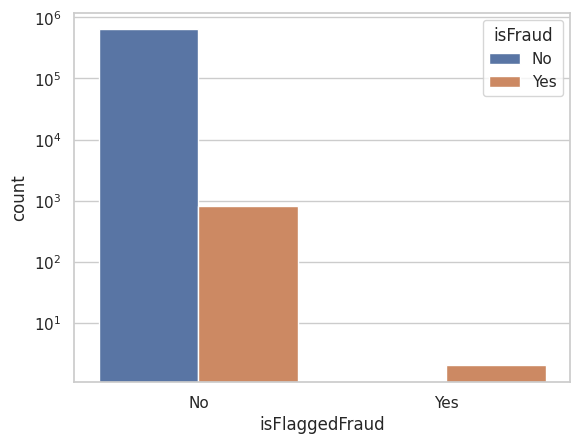

In [ ]:
sns.set_theme(style="whitegrid")

for categorical_feature in categorical_cols.drop(['nameOrig','nameDest'],axis=1).columns:
  plt.figure()
  sns.countplot(data=df, x=categorical_feature, hue="isFraud")
  #by applying a logarithmic scale to the y-axis, the differences in the count values for isFraud and isNotFraud will be compressed.
  #helps to avoid skewing the visualization toward the category with more values and provides a more balanced view of the data,
  #making it easier to identify patterns and differences between the categories.
  plt.yscale('log')
  plt.show()

# Feature Engineering


Encoding Categorical Variables

In [9]:
#Label encoding to convert yes and no to 1 and 0
#using boolean mask df['isFraud]=="Yes"
df['isFraud'] = (df['isFraud']=="Yes").astype(int)
df['isFlaggedFraud'] = (df['isFlaggedFraud']=="Yes").astype(int)
df

,cumulative_duration,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0,210329.85,-210329.84
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0,-21518.00,449198.34
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0,-4431.05,4431.05
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0,-46909.73,214026.20
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0,0.00,8858.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0,0,0.00,28761.10
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0,0,-62265.00,167820.70
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0,0,-8898.12,0.00
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0,0,-83669.00,176147.90


In [10]:
#Perform one hot encoding for 'type' categorical column
df_encoded = pd.get_dummies(df['type'])
df = pd.concat([df,df_encoded],axis=1)
df

,cumulative_duration,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0,210329.85,-210329.84,1,0,0,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0,-21518.00,449198.34,0,1,0,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0,-4431.05,4431.05,0,0,1,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0,-46909.73,214026.20,0,1,0,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0,0.00,8858.45,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0,0,0.00,28761.10,0,1,0,0,0
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0,0,-62265.00,167820.70,0,1,0,0,0
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0,0,-8898.12,0.00,0,0,0,1,0
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0,0,-83669.00,176147.90,0,1,0,0,0


Normalize numerical features

(Normalization ensures that all features have a similar scale or range, which prevents features with larger absolute values from dominating or having a disproportionate influence on the learning process.)

- in this case, normalization could be beneficial as

1. some numerical data has much larger absolute values than others (some features have different scales)

2. My algorithms such as SVM and KNN rely on distances between data points. Normalizing the data ensures that all features contribute equally to the distance calculations.

In [11]:
#Z score scaling (Standardization) - for numerical data
scaler = StandardScaler()
new_df = df.copy()
numerical_cols = df.select_dtypes(include = "number").drop(['isFraud','isFlaggedFraud','CASH_IN','CASH_OUT','DEBIT','PAYMENT', 'TRANSFER'],axis=1).columns

new_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
new_df



,cumulative_duration,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.281514,CASH_IN,0.049873,C1159819632,1.021013,1.073345,C1218876138,0.125335,0.023830,0,0,1.295768,-0.396184,1,0,0,0,0
1,-0.779395,CASH_OUT,0.058373,C1372369468,-0.280796,-0.291938,C467105520,1.555243,1.524296,0,0,-0.291342,0.381649,0,1,0,0,0
2,0.787378,DEBIT,-0.289351,C1059822709,-0.281089,-0.286377,C76588246,-0.300806,-0.310841,0,0,-0.174373,-0.142900,0,0,1,0,0
3,-0.758318,CASH_OUT,0.055963,C1464960643,-0.271997,-0.291938,C1059379810,3.665133,3.407810,0,0,-0.465160,0.104292,0,1,0,0,0
4,0.970051,CASH_OUT,-0.282056,C831134427,-0.288253,-0.291938,C579876929,0.169156,0.124235,0,0,-0.144041,-0.137678,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,0.759274,CASH_OUT,-0.249266,C742050657,-0.288253,-0.291938,C568407561,-0.227434,-0.236451,0,0,-0.144041,-0.114205,0,1,0,0,0
636258,-0.414049,CASH_OUT,-0.020162,C561181412,-0.266676,-0.291938,C1852953580,-0.293235,-0.259164,0,0,-0.570274,0.049799,0,1,0,0,0
636259,-1.460907,PAYMENT,-0.281991,C1773417333,-0.277577,-0.284437,M445701551,-0.324766,-0.334174,0,0,-0.204953,-0.148126,0,0,0,1,0
636260,0.239358,CASH_OUT,-0.006443,C1423233247,-0.259258,-0.291938,C1328739120,-0.324766,-0.285996,0,0,-0.716795,0.059619,0,1,0,0,0


Changing nameOrig and nameDest names to first character of the names, to reduce categories in these categorical data

In [12]:
#changing nameOrig and nameDest names
#using apply and lambda functions to extract first character of each name
new_df['nameOrig'] = new_df['nameOrig'].apply(lambda x:x[0])
new_df['nameDest'] = new_df['nameDest'].apply(lambda x:x[0])

#nameOrig now only has one name, so not useful as an input feature and can drop nameOrig column
new_df.drop('nameOrig',axis=1,inplace=True)
new_df


,cumulative_duration,type,amount,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.281514,CASH_IN,0.049873,1.021013,1.073345,C,0.125335,0.023830,0,0,1.295768,-0.396184,1,0,0,0,0
1,-0.779395,CASH_OUT,0.058373,-0.280796,-0.291938,C,1.555243,1.524296,0,0,-0.291342,0.381649,0,1,0,0,0
2,0.787378,DEBIT,-0.289351,-0.281089,-0.286377,C,-0.300806,-0.310841,0,0,-0.174373,-0.142900,0,0,1,0,0
3,-0.758318,CASH_OUT,0.055963,-0.271997,-0.291938,C,3.665133,3.407810,0,0,-0.465160,0.104292,0,1,0,0,0
4,0.970051,CASH_OUT,-0.282056,-0.288253,-0.291938,C,0.169156,0.124235,0,0,-0.144041,-0.137678,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,0.759274,CASH_OUT,-0.249266,-0.288253,-0.291938,C,-0.227434,-0.236451,0,0,-0.144041,-0.114205,0,1,0,0,0
636258,-0.414049,CASH_OUT,-0.020162,-0.266676,-0.291938,C,-0.293235,-0.259164,0,0,-0.570274,0.049799,0,1,0,0,0
636259,-1.460907,PAYMENT,-0.281991,-0.277577,-0.284437,M,-0.324766,-0.334174,0,0,-0.204953,-0.148126,0,0,0,1,0
636260,0.239358,CASH_OUT,-0.006443,-0.259258,-0.291938,C,-0.324766,-0.285996,0,0,-0.716795,0.059619,0,1,0,0,0


One hot encoding for 'nameDest' categorical data

In [13]:
newdf_encoded = pd.get_dummies(new_df['nameDest'], prefix="nameDest")
new_df = pd.concat([new_df,newdf_encoded],axis=1)
new_df

,cumulative_duration,type,amount,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,changebalanceOrig,changebalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_C,nameDest_M
0,0.281514,CASH_IN,0.049873,1.021013,1.073345,C,0.125335,0.023830,0,0,1.295768,-0.396184,1,0,0,0,0,1,0
1,-0.779395,CASH_OUT,0.058373,-0.280796,-0.291938,C,1.555243,1.524296,0,0,-0.291342,0.381649,0,1,0,0,0,1,0
2,0.787378,DEBIT,-0.289351,-0.281089,-0.286377,C,-0.300806,-0.310841,0,0,-0.174373,-0.142900,0,0,1,0,0,1,0
3,-0.758318,CASH_OUT,0.055963,-0.271997,-0.291938,C,3.665133,3.407810,0,0,-0.465160,0.104292,0,1,0,0,0,1,0
4,0.970051,CASH_OUT,-0.282056,-0.288253,-0.291938,C,0.169156,0.124235,0,0,-0.144041,-0.137678,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,0.759274,CASH_OUT,-0.249266,-0.288253,-0.291938,C,-0.227434,-0.236451,0,0,-0.144041,-0.114205,0,1,0,0,0,1,0
636258,-0.414049,CASH_OUT,-0.020162,-0.266676,-0.291938,C,-0.293235,-0.259164,0,0,-0.570274,0.049799,0,1,0,0,0,1,0
636259,-1.460907,PAYMENT,-0.281991,-0.277577,-0.284437,M,-0.324766,-0.334174,0,0,-0.204953,-0.148126,0,0,0,1,0,0,1
636260,0.239358,CASH_OUT,-0.006443,-0.259258,-0.291938,C,-0.324766,-0.285996,0,0,-0.716795,0.059619,0,1,0,0,0,1,0


#Feature Selection for Model and OverSampling

Initially, I wanted to select 2 target variables ('isFraud' and 'isFlaggedFraud') for multilabel/multioutput classification. However, I encountered 2 issues with multilabel classification:

1. Oversampling for data with multilabeled outputs (more than one target variable) could not be performed with SMOTEN or ROS or most other libraries

2. There was large imbalance in training dataset for 'isFlaggedFraud' label, where dataset only had 2 instances where 'isFlaggedFraud' was True/1. This caused the ML model to predict NO positive cases for the 'isFlaggedFraud' label on the testing dataset

Thus, multilabel classification was scrapped, and single-label classification/multi-class classification was chosen instead


Initially, I wanted to perform oversampling for the positive samples (where "isFraud" = 1/True) to correct the class imbalance, however this resulted in overfitting (where all the models had evaluation metrics greater than 0.93). Synthetic Fraud Samples introduced noise and overfitting, and models could not generalize well to new, unseen data and Fraud patterns.

In fraud detection, the priority is to ensure that the model can accurately identify genuine fraud patterns based on real data, not on artificially created samples. Generating synthetic fraud samples can distort the underlying patterns in the data and may result in a model that is not robust enough to detect genuine fraud cases in production.

Thus, I eventually decided not to oversample Fraud data. Instead to handle the class imbalance, I used some anomaly detection algorithms, class weights (assigning higher weights to minority class), and evaluation metrics such as AUC-ROC. Nevertheless, example oversampling is shown below.

In [14]:
#Selecting input features and target variables to train model

xdata = new_df.drop(['type','nameDest','isFraud','isFlaggedFraud'],axis=1)
ydata = new_df['isFraud']


#Oversampling is a technique used to balance imbalanced datasets,
#especially in the context of binary classification where one class has significantly fewer samples than the other.
#address class imbalance by oversampling the minority class randomly.
#oversampling generates new/more data for the minority class, and takes in both x and y to ensure synthentic samples maintain relationship between features and target labels.


#from imblearn.over_sampling import SMOTE
#Sythetic Minority Over Sampling Technique (SMOTE)
#Create an instance of SMOTE
#oversampler = SMOTE()
#x,y = oversampler.fit_resample(xdata,ydata)

#from sklearn.model_selection import train_test_split
#splitting the existing oversampled dataset as its currently too large, resulting in long model training times
#x_wanted, x_unwanted, y_wanted, y_unwanted = train_test_split(x,y, train_size = 0.6, random_state=30, stratify=y)



In [15]:
ydata.shape

(636262,)

#Splitting data into train, validation and test datasets

In [16]:
#train test split function splits the dataset into a training set and testing set
from sklearn.model_selection import train_test_split


#splitting the dataset into training and testing datasets in the ratio 7:3
#random_state ensures split reproduciblity and that function will always generate the same random split

#stratify is used for stratified sampling, to ensure the distribution/proportion of classes in the target variable
#will be preserved in both the training and testing sets.
#each class is represented in the training and testing sets in a proportion that is similar to the original dataset.
xtrain, xtemp, ytrain, ytemp = train_test_split(xdata,ydata, train_size = 0.7, random_state=30, stratify=ydata)


#splitting the testing dataset further into validation and testing datasets in the ratio 1:1
xvalidate, xtest, yvalidate, ytest = train_test_split(xtemp, ytemp, train_size = 0.5, random_state=30, stratify=ytemp)



In [17]:
len(xtrain)

445383

# ML Model Training
# Multi Class/Single Label Classification is used to predict "isFraud" label

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# SVM Model Training
No hyperparameter tuning yet

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points, and maximizes the margin between 2 classes.

SVM uses a cost function - hinge loss that quantifies the extent to which misclassified data points cross the decision boundary (margin) defined by the support vectors in an SVM model. It is designed to penalize misclassifications and encourage a larger margin between the classes.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize SVM model
svm_model = SVC()

#trains SVM model on training data "xtrain" and "ytrain"
svm_model.fit(xtrain,ytrain)

SVC()

In [ ]:
#uses trained SVM model to make predictions on test data "xtest", assign predictions to ypred variable
ypred = svm_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       1.00      0.47      0.64       123

    accuracy                           1.00     95440
   macro avg       1.00      0.74      0.82     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
#Calculating AUC-ROC Score (measure of recall of positive class across different classification thresholds)

#predict_proba returns 2d array with shape (no_samples,2) with first column represents probabilities of negative class
#while second column represents probabilities of positive class for each sample
#probabilities of positive class for each sample
y_pred_probs = svm_model.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_probs)
# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

print("AUC-ROC:", roc_auc)

AttributeError: ignored

# SVM Model Evaluation (before hyperparameter tuning)

Without Oversampling of Fraud Data

1. Without oversampling, the recall for class 1 was 0.47 (only detected 47% of all Fraud transactions (true positives)), and f1-score for class 1 was 0.64. Precision for class 1 was 1 (all predicted positives were true positives/no false positives (no false alarms))

With Oversampling of Fraud Data

1. With oversampling, the recall for class 1 was 0.95 (was able to detect 95% of all Fraud Transactions), and f1 score for class 1 was 0.96.

Initially, I misinterpreted and thought that oversampling allowed the model to learn patterns and relationships for the minority class better, but in actual fact, overfitting occurred where model learnt the synthetic data well, but could not capture relationships in real world fraud data as synthetic data introduced noise.

#Evaluation Metrics

In the context of class 1(positive case)

Precision: Ratio of True positive predictions to all positive predictions (high precision indicates low number of False Positives/False Alarms, very accurate for the positive predictions model makes)

Recall: Ratio of True positive predictions to total actual positive instances in the dataset (high recall means model can identify most of the true positive cases)

Accuracy: Ratio of correct predictions (both true positives and true negatives) to total number of instances in dataset, measures OVERALL correctness of model's predictions

F1 Score: the harmonic mean of precision and recall. It is a single metric that balances both precision and recall.


In financial fraud detection, you want to strike a balance between identifying as many fraud cases as possible (high recall) while minimizing the number of false alarms (high precision). A high recall helps you catch most fraud cases, while a high precision ensures that the cases flagged as fraud are indeed fraudulent.

As a result, the F1-score can also be a useful metric to consider, as it balances both recall and precision. The F1-score will be high when both recall and precision are high, indicating a well-performing model for fraud detection.


"macro avg" and "weighted avg" refer to the average of the evaluation metrics (precision, recall, and F1-score) calculated across all classes (labels).

# SVM Hyperparameter optimization with cross validation

In [ ]:
import sklearn.metrics
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 'scale', 'auto']
}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distributions, scoring='f1', cv=3, n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the validation data
random_search.fit(xvalidate, yvalidate)

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [ ]:
#Updating hyperparameters of trained model with the best hyperparameters
svm_model.set_params(**best_params)
ypred = svm_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       1.00      0.47      0.64       123

    accuracy                           1.00     95440
   macro avg       1.00      0.74      0.82     95440
weighted avg       1.00      1.00      1.00     95440



Cross-validation is used to estimate the model's performance for different hyperparameter configurations, and it helps in the selection of hyperparameters that are expected to generalize well to new data.


 Cross-validation is performed on the validation dataset using the trained model and a specific scoring metric (e.g accuracy, F1-score). This involves splitting the validation dataset into multiple folds, training the model with a specific set of hyperparameters on a subset of the folds, and evaluating its performance on the remaining folds.

 This is repeated for different combinations of hyperparameters, and the hyperparameters which cause the best cross-validated performance on the validation dataset are chosen for the final model (final model will then make predictions for the test dataset)

 In this case, the best hyperparameters yielded the same results as the default hyperparameters, possibly because the n_iter value and cv (cross validation) values were quite low to reduce hyperparameter tuning time. Nevertheless, an example of how to perform hyperparameter optimization for standard classification models.



# Logistic Regression Model

Logistic regression is a type of binary classification algorithm used to predict outcomes with two possible classes. It works by fitting a curve to the data, which represents the probability of an instance belonging to a particular class. The curve is called the logistic function or sigmoid, and it smoothly transitions between 0 and 1.

The model calculates a weighted sum of input features and adds a bias term to produce the predicted probability. These weights and bias are learned during training to make accurate predictions. If the probability is above a threshold (usually 0.5), the instance is classified as one class; otherwise, it's classified as the other class.

During training, the model minimizes a cost function, adjusting the weights and bias to make better predictions. This optimization process is typically done using gradient descent. Logistic regression is widely used for simple binary classification tasks, such as predicting whether an email is spam or not, based on certain features.

The cost function is the "logistic loss" / "binary cross-entropy" loss function. It measures the error between the predicted probabilities and the actual binary labels of the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#initialize the logistic regression model
LRmodel = LogisticRegression(max_iter=2000)

#trains model on training data "xtrain" and "ytrain"
LRmodel.fit(xtrain,ytrain)



LogisticRegression(max_iter=2000)

In [ ]:
ypred = LRmodel.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.84      0.47      0.60       123

    accuracy                           1.00     95440
   macro avg       0.92      0.74      0.80     95440
weighted avg       1.00      1.00      1.00     95440



#Hyperparameter Optimization with cross validation for Logistic Regression Model



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    #'C' defines the relative strength of regularization, smaller values indicate stronger regularization
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=LRmodel, param_distributions=param_distributions, scoring='f1', cv=4, n_iter=6, random_state=42)

# Fit the RandomizedSearchCV object to the validation data
random_search.fit(xvalidate, yvalidate)

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'solver': 'lbfgs', 'C': 10}


In [ ]:
LRmodel.set_params(**best_params)
ypred = LRmodel.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.84      0.47      0.60       123

    accuracy                           1.00     95440
   macro avg       0.92      0.74      0.80     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   58,    11],
       [   65, 95306]])

# K Nearest Neighbours Model

K-nearest neighbors (KNN) is a simple and intuitive algorithm used for classification and regression tasks. In KNN, the prediction for a new data point is based on the majority class of its K closest neighbors in the training data (for classification) or the average of their target values (for regression). The value of K, which represents the number of neighbors, is a hyperparameter that we can choose.

To make a prediction, KNN measures the distance between the new data point and all points in the training data using a distance metric like Euclidean or Manhattan distance. It then selects the K data points with the smallest distances as the neighbors. KNN is a non-parametric algorithm, meaning it does not learn from the training data; instead, it memorizes the entire training dataset.

However, it can be computationally expensive for large datasets and may require preprocessing or dimensionality reduction techniques such as PCA to handle large no of features.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#initializes a new KNN model with n_neighbor==55
KNN_model = KNeighborsClassifier(n_neighbors=55)

KNN_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
ypred = KNN_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.92      0.37      0.53       123

    accuracy                           1.00     95440
   macro avg       0.96      0.69      0.77     95440
weighted avg       1.00      1.00      1.00     95440



So Far KNN, SVM and Logistic Regression models all have subpar evaluation metrics. KNN model has the lowest precision, recall and f1 score amongst KNN, SVM and Logistic Regression Algorithms. Possibly due to high dimensional data, causing the "curse of dimensionality" for KNN since it relies on distance calculations between points which can lose meaning when the dimensions are too high.

# Hyperparameter Tuning with cross validation for KNN

In [ ]:
param_distributions = {
    'n_neighbors': [25, 55, 85, 105],
    #metric for calculating distance between data points
    'metric': ['euclidean', 'manhattan']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=KNN_model, param_distributions=param_distributions, scoring='f1', cv=4, n_iter=8, random_state=42)

# Fit the RandomizedSearchCV object to the validation data
random_search.fit(xvalidate, yvalidate)

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 25, 'metric': 'euclidean'}


In [ ]:
KNN_model.set_params(**best_params)
ypred = KNN_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.95      0.42      0.58       123

    accuracy                           1.00     95440
   macro avg       0.97      0.71      0.79     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   52,     3],
       [   71, 95314]])

Can see that hyperparameter optimization was beneficial as it improved the precision for class 1 from 0.92 to 0.95 (reduced false positives/false alarms) and the recall for class 1 from 0.37 to 0.42 (improved ability to successfully identify fraud transactions)

# Random Forest Model




Random Forest is an ensemble learning method that combines multiple decision trees to make more accurate predictions. It works by creating a "forest" of decision trees, where each tree is trained on a random subset of the data and features. During prediction, each tree votes on the final outcome, and the majority vote becomes the final prediction. This voting process helps reduce overfitting and improves the model's performance on unseen data. By combining many diverse trees, Random Forest can handle complex relationships between features and target variables. It is effective for both regression and classification tasks. Overall, Random Forest is a powerful and versatile algorithm for various machine learning problems.

Each tree is trained on a random subset of the data, which is known as "bootstrapping". The term "bagging" stands for "Bootstrap Aggregating," where "bootstrap" refers to the random sampling of data with replacement. This means that each tree is trained on a different subset of the data, which introduces diversity and reduces the risk of overfitting. Additionally, for each decision tree, only a random subset of features (controlled by max_features parameter) is considered, adding further diversity to the model and making it less likely to rely on one dominant feature.

In [ ]:
#importing RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier

#initializing the random forest classifier model with 100 decision trees
randomforest = RandomForestClassifier(n_estimators = 100)

#training random forest model on training data
randomforest.fit(xtrain,ytrain)

from sklearn.metrics import classification_report, confusion_matrix

ypred = randomforest.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.99      0.75      0.85       123

    accuracy                           1.00     95440
   macro avg       0.99      0.87      0.93     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   92,     1],
       [   31, 95316]])

So Far Random Forest is the best algorithm with highest evaluation metrics (for class 1: precision of 0.99, recall of 0.75 and f1 score of 0.85)

#Hyperparameter tuning with cross validation for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    #no of decision trees in random forest
    'n_estimators': [50, 100, 300, 500],

    #no of training samples used for each decision tree
    'max_samples': [0.6, 0.8, 1.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=randomforest, param_distributions=param_distributions, scoring='f1', cv=4, n_iter=8, random_state=42)

# Fit the RandomizedSearchCV object to the validation data
random_search.fit(xvalidate, yvalidate)

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 50, 'max_samples': 1.0}


In [ ]:
randomforest.set_params(**best_params)
ypred = randomforest.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.99      0.75      0.85       123

    accuracy                           1.00     95440
   macro avg       0.99      0.87      0.93     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   92,     1],
       [   31, 95316]])

#XGBoost Model/Algorithm

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
xgboost = xgb.XGBClassifier()

xgboost.fit(xtrain,ytrain)
ypred = xgboost.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.98      0.75      0.85       123

    accuracy                           1.00     95440
   macro avg       0.99      0.87      0.92     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   92,     2],
       [   31, 95315]])

In [ ]:
# Define the hyperparameter grid
param_distributions = {
    # Learning rate (step size shrinkage)
    'eta': [0.01, 0.1, 0.3],
    # Maximum depth of a tree
    'max_depth': [3, 5, 7],
    # Subsample ratio of the training instance
    'subsample': [0.6, 0.8, 1.0],
    # Subsample ratio of columns when constructing each tree
    'colsample_bytree': [0.6, 0.8, 1.0],
    # L2 regularization term on weights
    'lambda': [0, 0.1, 1],
    # L1 regularization term on weights
    'alpha': [0, 0.1, 1]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgboost, param_distributions=param_distributions, scoring='f1', cv=3, n_iter=8, random_state=42)

# Fit the RandomizedSearchCV object to the validation data
random_search.fit(xvalidate, yvalidate)

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
#In this example, we are tuning various hyperparameters such as learning rate (eta), maximum depth of trees (max_depth),
#minimum child weight (min_child_weight), subsample ratio (subsample), column subsample ratio (colsample_bytree),
#L2 regularization (lambda), and L1 regularization (alpha) for the XGBoost model.
#You can modify the param_distributions dictionary to include other hyperparameters as well.


Best Hyperparameters: {'subsample': 0.8, 'max_depth': 5, 'lambda': 0.1, 'eta': 0.3, 'colsample_bytree': 0.8, 'alpha': 0}


In [ ]:
xgboost.set_params(**best_params)
ypred = xgboost.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.98      0.75      0.85       123

    accuracy                           1.00     95440
   macro avg       0.99      0.87      0.92     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   92,     2],
       [   31, 95315]])

# TensorFlow Neural Network




# Before hyperparameter optimization

In [ ]:
import tensorflow as tf

#documentation
#https://www.tensorflow.org/tutorials/keras/classification

#Building the neural network requires configuring the layers of the model, then compiling the model.

#setting up the layers of neural network / defining model architecture
neural_network_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])


#compiling the model with accuracy and recall metrics
neural_network_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.Recall()])


#training the model
#feed the training data to the model
neural_network_model.fit(xtrain,ytrain,epochs = 10)


#comparing how model performs on validation dataset vs training dataset by evaluating accuracy on validation dataset

#this gap between training accuracy and validation accuracy represents overfitting.
#evaluate function will return the metrics specified during compiling
#however, validation loss is returned by the evaluate function even if it's not specified in the model compilation.
val_loss, val_accuracy, val_recall = neural_network_model.evaluate(xvalidate,yvalidate,verbose=2)
#verbose shows how much information is displayed in the console when evaluating the model


print(f"Validation_loss: {val_loss}")
print(f"Validation_accuracy: {val_accuracy}")
print(f"Validation_recall (positive class): {val_recall}")

Epoch 1/10
13919/13919 [==============================] - 50s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - recall_1: 0.4765
Epoch 2/10
13919/13919 [==============================] - 51s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - recall_1: 0.5739
Epoch 3/10
13919/13919 [==============================] - 54s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - recall_1: 0.6122
Epoch 4/10
13919/13919 [==============================] - 62s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - recall_1: 0.6296
Epoch 5/10
13919/13919 [==============================] - 40s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - recall_1: 0.6261
Epoch 6/10
13919/13919 [==============================] - 41s 3ms/step - loss: 0.0031 - accuracy: 0.9995 - recall_1: 0.6452
Epoch 7/10
13919/13919 [==============================] - 45s 3ms/step - loss: 0.0032 - accuracy: 0.9995 - recall_1: 0.6365
Epoch 8/10
13919/13919 [==============================] - 40s 3ms/step - loss: 0.0030 - accuracy: 0.9995 - recall_1: 0.6452
Epoch 9/

The validation accuracy was very close to the training accuracy, meaning that the overall model accuracy was still high even for unseen validation dataset. However, this is mostly due to the model learning patterns for the negative case well (and negative cases was the majority in the imbalanced dataset). This is evident in how the recall for class 1 is 0.60 for validation dataset, which is not high, meaning that neural network model is unable to detect Fraud cases very accurately.

In [ ]:
#predict function of a Keras model returns a NumPy array containing the predicted probabilities for each sample in the input data
#For binary classification, the array has the shape (number_of_samples, 1).
#Each row contains the predicted probability for class 1 for each corresponding sample in xtest
ypred = np.round(neural_network_model.predict(xtest))
print(classification_report(ytest,ypred))

2983/2983 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.97      0.56      0.71       123

    accuracy                           1.00     95440
   macro avg       0.99      0.78      0.86     95440
weighted avg       1.00      1.00      1.00     95440



In [ ]:
confusion_matrix(ypred,ytest,labels=[1,0])

array([[   69,     2],
       [   54, 95315]])

In [ ]:
#AUC ROC Score
from sklearn.metrics import roc_auc_score

predicted_probabilities = neural_network_model.predict(xtest)
auc_roc = roc_auc_score(ytest,predicted_probabilities)
print(f"AUC Roc Score: {auc_roc}")

2983/2983 [==============================] - 9s 3ms/step
AUC Roc Score: 0.9743887555014329


# Hyperparameter Optimization

function to define model architecture with different hyperparameter configurations, then compile model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#function to define model architecture with different hyperparameter configurations,
#then compile model
def create_model(no_nodes,starting_learning_rate):

    #setting up the layers of neural network / defining model architecture
    neural_network_model = tf.keras.Sequential([
        tf.keras.layers.Dense(no_nodes, activation = "relu"),
        tf.keras.layers.Dense(no_nodes,activation = "relu"),
        tf.keras.layers.Dense(no_nodes,activation = "relu"),
        tf.keras.layers.Dense(1,activation = 'sigmoid'),
    ])


    #using learning rate scheduling to decrease the learning rate over time during training
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        # Initial learning rate
        initial_learning_rate = starting_learning_rate,
        # Decay steps (how often to decay the learning rate)
        decay_steps=1000,
        # Decay rate (how much to reduce the learning rate at each step)
        decay_rate=0.96)


    #Compiling the model
    neural_network_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate_schedule),
                                 loss='binary_crossentropy',
                                 metrics = ['accuracy',tf.keras.metrics.Recall()])

    return neural_network_model



Performing hyperparameter tuning with cross validation on training data. StratifiedKFold object splits original training data into training and validation datasets for each fold. Model is trained on training data, and evaluated on validation data for each fold, and average validation recall is calculated for each hyperparameter configuration. Best hyperparameters are selected for best model, which is then retrained on training data.

TLDR: Hyperparameter tuning with cross validation is performed on training data. Best model is selected, and then retrained on training data.

Notes: The preferred method is to perform cross validation on training data. This way each model (with unique hyperparameters) is trained on subfolds of training data and evaluated on other folds of training data (which act as validation data). However, this takes a long time.

In [ ]:
from sklearn.model_selection import StratifiedKFold

nodes_list = [64,128]
learning_rates = [0.001,0.005]

# Initialize K-Fold cross-validator
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

overall_results = []

for nodes in nodes_list:
    for learning_rate in learning_rates:

        hyperparam_set_results = []
        list_of_tuples = kfold.split(xtrain, ytrain)

        for train_index, val_index in list_of_tuples:
            x_train, x_val = xtrain.iloc[train_index], xtrain.iloc[val_index]
            y_train, y_val = ytrain.iloc[train_index], ytrain.iloc[val_index]

            #creating and compiling new model
            nn_model = create_model(nodes,learning_rate)

            #training the model
            nn_model.fit(x_train,y_train,epochs = 10)
            #evaluating model on validation dataset
            val_loss, val_accuracy, val_recall = nn_model.evaluate(x_val,y_val,verbose=2)

            hyperparam_set_results.append(val_recall)

        hyperparam_set_avg_recall = np.mean(hyperparam_set_results)
        overall_results.append((nodes,learning_rate,hyperparam_set_avg_recall))

# Sort the results based on average recall (highest to lowest)
overall_results.sort(key=lambda x: x[2], reverse=True)

# Print the results
for i, (no_nodes, starting_learning_rate, avg_recall) in enumerate(overall_results, 1):
    print(f"Rank {i}: No. of Nodes={no_nodes}, Learning Rate={starting_learning_rate}, Average Recall={avg_recall}")


Epoch 1/10
10439/10439 [==============================] - 30s 3ms/step - loss: 0.0053 - accuracy: 0.9988 - recall: 0.4733
Epoch 2/10
10439/10439 [==============================] - 27s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - recall: 0.5893
Epoch 3/10
10439/10439 [==============================] - 26s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - recall: 0.6450
Epoch 4/10
10439/10439 [==============================] - 41s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - recall: 0.6729
Epoch 5/10
10439/10439 [==============================] - 27s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - recall: 0.6682
Epoch 6/10
10439/10439 [==============================] - 27s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - recall: 0.6914
Epoch 7/10
10439/10439 [==============================] - 26s 2ms/step - loss: 0.0019 - accuracy: 0.9996 - recall: 0.6868
Epoch 8/10
10439/10439 [==============================] - 26s 2ms/step - loss: 0.0018 - accuracy: 0.9996 - recall: 0.6914
Epoch 9/10
10439/10439 [

In [ ]:
best_model = create_model(128,0.001)
best_model.fit(xtrain,ytrain,epochs=10)

ypred = np.round(best_model.predict(xtest))

Epoch 1/10
13919/13919 [==============================] - 56s 4ms/step - loss: 0.0045 - accuracy: 0.9991 - recall_16: 0.4870
Epoch 2/10
13919/13919 [==============================] - 46s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - recall_16: 0.6226
Epoch 3/10
13919/13919 [==============================] - 55s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - recall_16: 0.6539
Epoch 4/10
13919/13919 [==============================] - 49s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - recall_16: 0.6713
Epoch 5/10
13919/13919 [==============================] - 44s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - recall_16: 0.6887
Epoch 6/10
13919/13919 [==============================] - 40s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - recall_16: 0.6974
Epoch 7/10
13919/13919 [==============================] - 41s 3ms/step - loss: 0.0022 - accuracy: 0.9996 - recall_16: 0.6991
Epoch 8/10
13919/13919 [==============================] - 45s 3ms/step - loss: 0.0022 - accuracy: 0.9996 - recall_16: 0.7043


NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95317
           1       0.94      0.67      0.79       123

    accuracy                           1.00     95440
   macro avg       0.97      0.84      0.89     95440
weighted avg       1.00      1.00      1.00     95440



So Far Random Forest is the best model with a recall of 0.75 and precision of 0.99 for class 1. Meaning it could identify 75% of all fraud transactions, and 99% of transactions identified as positives are true positives.

# Pytorch Neural Network

In [39]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import ToTensor

In [20]:
#Define hyperparameters
feature_no = xtrain.shape[1]
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [21]:
# Define neural network architecture for BCEWithLogitsLoss function
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=feature_no, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [53]:
# Model Architecture for BCELoss loss function
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=feature_no, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [54]:
# Convert training and validation dataframes into numpy arrays, before converting to pytorch tensors
xtrain_tensor = torch.tensor(xtrain.to_numpy(), dtype=torch.float32)
ytrain_tensor = torch.tensor(ytrain.to_numpy(), dtype=torch.float32)

xval_tensor = torch.tensor(xvalidate.to_numpy(), dtype=torch.float32)
yval_tensor = torch.tensor(yvalidate.to_numpy(), dtype=torch.float32)

xtrain_tensor

tensor([[ 1.1106, -0.1680,  0.1340,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.6516, -0.1988,  0.5851,  ...,  0.0000,  1.0000,  0.0000],
        [-0.0557, -0.1042, -0.0998,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 0.0637, -0.2874,  1.2726,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.7874, -0.2362, -0.2727,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.4361,  1.1173, -0.2850,  ...,  1.0000,  1.0000,  0.0000]])

In [55]:
#TensorDataset is a PyTorch class that creates a dataset from one or more tensors.
#In this case, TensorDataset combines the xtrain_tensor and ytrain_tensor into one training dataset,
#so that each element of the dataset consists of a pair (x, y) where x is an input feature tensor and y is a corresponding target label tensor.

train_dataset = TensorDataset(xtrain_tensor, ytrain_tensor)
val_dataset = TensorDataset(xval_tensor, yval_tensor)


#DataLoader object splits the train_dataset into batches, returning an iterator (list of tuples)
#that provides batches of training data
#Each batch is typically a tuple where the first element is a tensor containing the input data (features) and the second element is a tensor containing the corresponding target labels.

#we can then iterate over train_loader to train the model in batches
#Thus, DataLoader manages the loading and organization of data in batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

Focal Loss Cost Function

In [45]:
#focal loss function, which is specially designed for imbalanced datasets.
#Focal Loss function focuses on training the model on hard/misclassified samples by down-weighing easy samples.
#This can help improve the model's performance on the minority class, which are usually harder to predict

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        pt = torch.exp(-inputs)
        ce_loss = -targets * torch.log(pt)
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss


In [56]:
# Initialize the neural network model
model = NeuralNetwork()

# Define loss function and optimizer
BCELoss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
#to calculate overall recall metric for class 1 for all epochs
total_positive_instances = 0
total_identified_positive_instances = 0


# Training loop
for epoch in range(num_epochs):
    #sets the model to training mode
    model.train()

    #iterate over batches of training data
    for batch_input_features, batch_output_label in train_loader:
        optimizer.zero_grad()

        #performs a forward pass through the neural network model. It computes the predicted outputs for the current batch of input features
        model_outputs = model(batch_input_features)


        #calculates the loss between the predicted probabilities (model_outputs) and the actual probabilities (targets).
        loss = BCELoss(model_outputs, batch_output_label.unsqueeze(1))

        #backpropagation to compute the gradients of the loss with respect to the model's parameters.
        loss.backward()

        #optimizer updates the model's parameters based on the computed gradients.
        optimizer.step()


    #AFTER A FULL EPOCH OF TRAINING IS COMPLETED
    #set model to evaluation mode
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    epoch_positive_instances = 0
    epoch_identified_positive_instances = 0


    #temporarily disables gradient calculation to speed up computation during validation
    #as gradients are not needed for evaluation
    with torch.no_grad():
         for (batch_input_features, batch_output_label) in val_loader:

            #performs a forward pass through the model to compute predicted outputs.
            predicted_outputs = model(batch_input_features)


            #calculates the validation loss for the current batch and adds it to val_loss,
            #unsqueeze(1) increases dimensions at index 1, this is necessary as yvalidate and yval_tensor are both 1d, hence batch_output_label is also 1d
            val_loss += BCELoss(predicted_outputs, batch_output_label.unsqueeze(1)).item()


            #converts the predicted outputs to binary predictions (0 or 1) using a threshold of 0.5.
            #The squeeze() function removes dimensions of size 1, and long() converts the boolean tensor to a tensor of long (integer) data type.
            predicted = (predicted_outputs >= 0.5).squeeze().long()

            #to calculate validation recall for each epoch
            epoch_positive_instances += (batch_output_label == 1).sum().item()
            epoch_identified_positive_instances += (predicted ==1 ).sum().item()
            epoch_validation_recall = (epoch_identified_positive_instances/epoch_positive_instances) if epoch_positive_instances != 0 else "None"

            #to calculate overall validation accuracy for each epoch
            correct_predictions += (predicted == batch_output_label).sum().item()
            total_samples += batch_output_label.size(0)


    total_identified_positive_instances += epoch_identified_positive_instances
    total_positive_instances += epoch_positive_instances


    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {correct_predictions/total_samples:.4f}, Validation Recall (class 1): {epoch_validation_recall:.4f} ")


print(f"Overall Validation Recall for class 1: {total_identified_positive_instances/total_positive_instances}")

Epoch 1/10, Validation Loss: 4.2004, Validation Accuracy: 0.9994, Validation Recall (class 1): 0.5203 
Epoch 2/10, Validation Loss: 3.8766, Validation Accuracy: 0.9994, Validation Recall (class 1): 0.7154 
Epoch 3/10, Validation Loss: 3.2453, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.6585 
Epoch 4/10, Validation Loss: 3.7198, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.6585 
Epoch 5/10, Validation Loss: 3.5460, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.6341 
Epoch 6/10, Validation Loss: 3.5070, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.6179 
Epoch 7/10, Validation Loss: 3.1450, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.7236 
Epoch 8/10, Validation Loss: 3.1161, Validation Accuracy: 0.9996, Validation Recall (class 1): 0.7561 
Epoch 9/10, Validation Loss: 3.2029, Validation Accuracy: 0.9995, Validation Recall (class 1): 0.7154 
Epoch 10/10, Validation Loss: 3.2225, Validation Accuracy: 0.9995, Valida

In [58]:
# Evaluate on the test dataset
xtest_tensor = torch.tensor(xtest.values, dtype=torch.float32)
ytest_tensor = torch.tensor(ytest.values, dtype=torch.float32)
test_dataset = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model.eval()

#to calculate metrics for overall accuracy
test_correct = 0
test_total = 0

#to calculate metrics for class 1 recall
positive_instances = 0
identified_positive_instances = 0

#Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        predicted_probabilities = model(batch_x)
        predicted_binary_labels = (predicted_probabilities >= 0.5).squeeze().long()

        #class 1 recall metrics
        #sum of instances where batch y has positive class of 1
        positive_instances += (batch_y == 1).sum().item()
        identified_positive_instances += (predicted_binary_labels == 1).sum().item()

        #overall accuracy metrics
        test_correct += (predicted_binary_labels == batch_y).sum().item()
        test_total += batch_y.size(0)

print(f"Test Accuracy: {test_correct/test_total:.4f}")
print(f"Test Recall (class 1): {identified_positive_instances/positive_instances}")

Test Accuracy: 0.9994
Test Recall (class 1): 0.6178861788617886


# Hyperparameter optimization for Pytorch

In [59]:
# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self,no_nodes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=xtrain.shape[1], out_features=no_nodes)
        self.fc2 = nn.Linear(in_features=no_nodes, out_features=no_nodes//2)
        self.fc3 = nn.Linear(in_features=no_nodes//2, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [60]:
#hyperparameters lists

learning_rates = [0.001,0.0005]
num_epochs = [10,20]
no_nodes = [128,64]


In [61]:
# Convert training and validation dataframes into numpy arrays, before converting to pytorch tensors
xtrain_tensor = torch.tensor(xtrain.to_numpy(), dtype=torch.float32)
ytrain_tensor = torch.tensor(ytrain.to_numpy(), dtype=torch.float32)
xval_tensor = torch.tensor(xvalidate.to_numpy(), dtype=torch.float32)
yval_tensor = torch.tensor(yvalidate.to_numpy(), dtype=torch.float32)


train_dataset = TensorDataset(xtrain_tensor, ytrain_tensor)
val_dataset = TensorDataset(xval_tensor, yval_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [62]:
def train_validate_loop(nodes, learning_rate, epochs, train_loader, val_loader):
    print("New hyperparameter configuration")
    total_positive_instances = 0
    total_identified_positive_instances = 0

    # Initialize the model
    model = NeuralNetwork(no_nodes = nodes)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)


    for epoch in range(epochs):
        #sets the model to training mode
        model.train()

        for batch_no, (batch_input_features, batch_output_label) in enumerate(train_loader):
            optimizer.zero_grad()

            #performs a forward pass through neural network model. It computes predicted probability of class 1 for the current batch of input features
            predicted_prob = model(batch_input_features)

            #calculates the loss between the predicted probabilities and the actual target labels (batch_output_label).
            loss = criterion(predicted_prob, batch_output_label.unsqueeze(1))


            #backpropagation to compute the gradients of the loss wrt the model's parameters.
            loss.backward()
            #optimizer updates the model's parameters based on the computed gradients.
            optimizer.step()


        #AFTER A FULL EPOCH OF TRAINING IS COMPLETED
        #set model to evaluation mode
        model.eval()
        val_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        epoch_positive_instances = 0
        epoch_identified_positive_instances = 0

        with torch.no_grad():

            for batch_input_features, batch_output_label in val_loader:
                predicted_prob = model(batch_input_features)

                val_loss += criterion(predicted_prob,batch_output_label.unsqueeze(1))

                predicted_binary_labels = (predicted_prob>=0.5).squeeze().long()

                #overall accuracy for each epoch
                correct_predictions += (predicted_binary_labels == batch_output_label).sum().item()
                total_samples += batch_output_label.size(0)

                #class 1 recall for each epoch
                epoch_positive_instances += (batch_output_label == 1).sum().item()
                epoch_identified_positive_instances += (predicted_binary_labels == 1).sum().item()

        print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}, Validation Recall: {epoch_identified_positive_instances/epoch_positive_instances:.4f}, Validation Accuracy: {correct_predictions/total_samples:.4f} ")
        total_positive_instances += epoch_positive_instances
        total_identified_positive_instances += epoch_identified_positive_instances

    overall_val_recall = total_identified_positive_instances/total_positive_instances
    print(f"Overall Validation Recall (class 1): {overall_val_recall}")
    return overall_val_recall



In [ ]:
learning_rates = [0.001,0.0005]
num_epochs = [10,20]
no_nodes = [128,64]

overall_result = []

for epochs in num_epochs:
  for nodes in no_nodes:
    for learning_rate in learning_rates:
      hyperparam_recall = train_validate_loop(nodes, learning_rate, epochs, train_loader, val_loader)
      overall_result.append((epochs,nodes,learning_rate,hyperparam_recall))

overall_result.sort(key=lambda k:k[3],reverse=True)

for rank, (epochs,nodes,learning_rate,hyperparam_recall) in enumerate(overall_result,1):
  print(f"Rank {rank}, Epochs: {epochs}, Learning_rate: {learning_rate}, Nodes: {nodes}, Recall: {hyperparam_recall}")

# Algorithms comparison

Overall, Random Forest Algorithm yielded the best results with a recall of 0.75 for class 1, precision of 0.99 for class 1 and f1 score of 0.85 for class 1. XGBoost had very similar results with a recall of 0.75 for class 1, precision of 0.98 for class 1 and f1 score of 0.85 for class 1.

TensorFlow and PyTorch Neural Network Models had inconsistent and fluctuating results, giving large fluctuations in class 1 recall every time the model was trained. However, on average, the range for class 1 recall on validation and test datasets was between 0.60 to 0.70, which is below that of Random Forest and XGBoost.

SVM, KNN and Logistic Regression Models had the lowest class 1 recall ranging from 0.42 to 0.47, and class 1 precision ranging from 0.84 to 1.